In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

<!--<badge>--><a href="https://colab.research.google.com/github/softmatterlab/DeepTrack-2.0/blob/bm/fix-mie/examples/LodeSTAR/01. autotracker_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

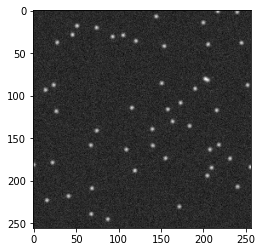

In [3]:
data = np.load("data/data.npy")
data = (data - np.min(data)) / np.ptp(data)

plt.imshow(data[0], cmap="gray")
plt.show()

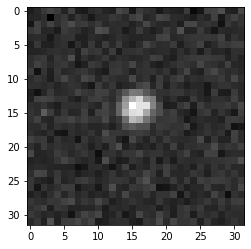

In [4]:
crop = data[0, 100:132, 100:132]
plt.imshow(crop, cmap="gray")

In [5]:
training_data = dt.Value(crop)

In [6]:
model = dt.models.LodeSTAR(input_shape=(None, None, 1))

In [7]:
model.fit(training_data, epochs=30, batch_size=8)

Generating 176 / 160 samples before starting training
Epoch 1/30
176/176 [==============================] - 6s 8ms/step - total_loss: 1.3081 - consistency_loss: 0.5909
Epoch 2/30
176/176 [==============================] - 2s 13ms/step - total_loss: 0.0773 - consistency_loss: 0.0116
Epoch 3/30
176/176 [==============================] - 2s 14ms/step - total_loss: 0.0547 - consistency_loss: 0.0048
Epoch 4/30
176/176 [==============================] - 3s 15ms/step - total_loss: 0.0456 - consistency_loss: 0.0041
Epoch 5/30
176/176 [==============================] - 3s 15ms/step - total_loss: 0.0394 - consistency_loss: 0.0032
Epoch 6/30
176/176 [==============================] - 2s 11ms/step - total_loss: 0.0381 - consistency_loss: 0.0033
Epoch 7/30
176/176 [==============================] - 2s 14ms/step - total_loss: 0.0487 - consistency_loss: 0.0046
Epoch 8/30
176/176 [==============================] - 2s 14ms/step - total_loss: 0.0414 - consistency_loss: 0.0036
Epoch 9/30
176/176 [=======

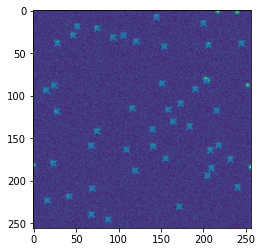

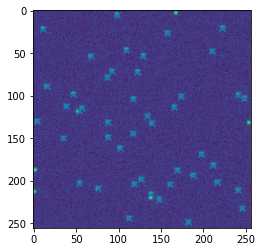

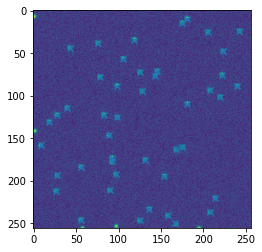

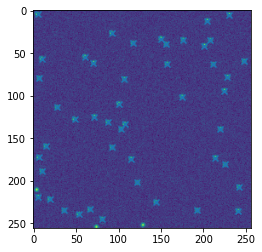

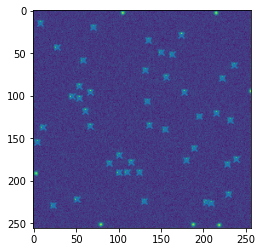

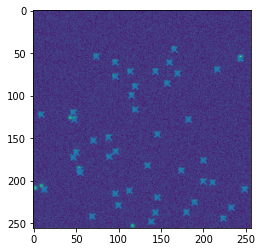

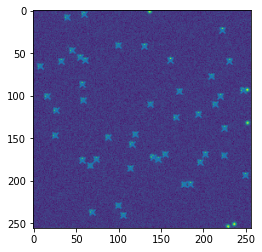

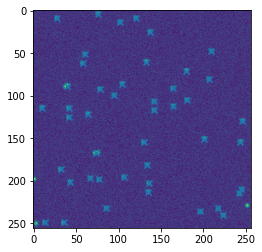

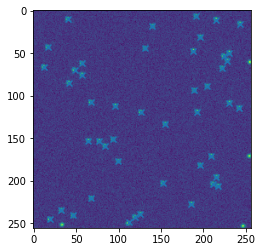

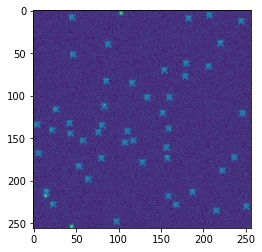

In [8]:
all_detections = model.predict_and_detect(data)

for frame, frame_detections in zip(data, all_detections):
    plt.imshow(frame)
    plt.scatter(frame_detections[:, 1], frame_detections[:, 0], marker="x")
    plt.show()